# EDA Google Play Store

## Complete Exploratory Analysis

**Author Name**: Danish Javaid Meo \
**Email**: danishjmeo@gmail.com\
**LinkedIn**: [link](https://www.linkedin.com/in/danish-javaid-4271a8231)\
**Kaggle**: [link](https://www.kaggle.com/danishjmeo)

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1.Importing Libraries

In [1]:
# import libaraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load Data set and EXploration|cleaning

- load data set through pandas
- creating dataframe and understanding dataframe present in data
- dealing with missing data and outliers and incorrect records


In [2]:
# How to load data set from your folder
df=pd.read_csv('../data/googleplaystore.csv')


In [3]:
df.head() # viewing first rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [6]:
# check column names
print(f"The names of columns in this dataset are as follows : {df.columns}")

The names of columns in this dataset are as follows : Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [7]:
# check shape of dataset
print(f"The number of rows are {df.shape[0]},and columns are {df.shape[1]}")

The number of rows are 10842,and columns are 13


In [8]:
 #infrmation of data set
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10842 non-null  object 
 1   Category        10842 non-null  object 
 2   Rating          9368 non-null   float64
 3   Reviews         10842 non-null  int64  
 4   Size            10842 non-null  object 
 5   Installs        10842 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10842 non-null  object 
 8   Content Rating  10842 non-null  object 
 9   Genres          10842 non-null  object 
 10  Last Updated    10842 non-null  object 
 11  Current Ver     10834 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
# to check numeric columns
df.describe()

# In this case we got only two numeric columns ,but if we look at data set ,we know that there are many  numeric columns

,Rating,Reviews
count,9368.000000,1.084200e+04
mean,4.191695,4.440714e+05
std,0.515181,2.927497e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.470600e+04
max,5.000000,7.815831e+07


### Making Size column into complete numeric

- Cecking missing values in size

In [10]:
df['Size'].isnull().sum()


0

- we got no missing values and we are ready to move further

In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
## Observations:
1. varies with device
2. M
3. k
---

- To conform that in this size column there are 3 types of values we will do some work

In [12]:
# Find the values having "M" in them
df["Size"].loc[df['Size'].str.contains("M")].value_counts().sum()

8831

In [13]:
# Find the values having "k" in them
df["Size"].loc[df['Size'].str.contains("k")].value_counts().sum()

316

In [14]:
# Find the values having "varies with device" in them
df["Size"].loc[df['Size'].str.contains("Varies with device")].value_counts().sum()

1695

In [15]:
8831+316+1695

10842

## Convert the whole Size column into bytes

## Let's define a function




In [16]:
def convert_size(Size):
    if isinstance(Size,str):
        if 'k' in Size:
            return float(Size.replace("k",""))*1024
        elif 'M' in Size:
            return float(Size.replace("M",""))*1024*1024
        elif "Varies with device" in Size:
            return np.nan
        return Size

In [17]:
# Let's apply this function
df['Size']=df['Size'].apply(convert_size)

In [18]:
df['Size']  #all size converted into numeric and nan means here was values with varies with device

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [19]:
# Rename the column 
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [20]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# If we have to convert the size in Mbs
df['size_in_Mb']=df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [22]:
# If we have to convert the size in kbs
df['size_in_kb']=df['Size_in_bytes'].apply(lambda x: x/(1024))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# Let's take care of installs

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           541
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [26]:
df['Installs'].isnull().sum()

0

1. Remove + Sign
2. remove ,
3. convert into an integer

In [27]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x )

In [28]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x )

In [29]:
df['Installs']=df['Installs'].apply(lambda x: int(x) )

In [30]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         541
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [31]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

In [32]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [33]:
df['Installs'].min()

0

In [34]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [35]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2161
High                  2120
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

# Let's see price column

In [36]:
df['Price'].value_counts()

Price
0          10042
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

- Let's see how many values have $ sign

In [37]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum() # backward slash is used for where only $ sign is

800

- It is saying that 800  prices contains $ sign .

In [38]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10042

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10042=10842 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [39]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [40]:
df['Price'].value_counts() # checking $ sign

Price
0         10042
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

- FInally $ sign removed

In [41]:
 #converting all  price into float 
df['Price']=df['Price'].apply(lambda x: float(x) )

In [42]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,size_in_Mb,size_in_kb
count,9368.000000,1.084200e+04,9.147000e+03,1.084200e+04,10842.000000,9147.000000,9147.000000
mean,4.191695,4.440714e+05,2.256970e+07,1.546158e+07,1.027179,21.524143,22040.722084
std,0.515181,2.927497e+06,2.369054e+07,8.502176e+07,15.948238,22.593055,23135.288830
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,2.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.470600e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [43]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [44]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0271785648404355 $


### **2.1. Descriptive Statistics**

In [45]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,size_in_Mb,size_in_kb
count,9368.000000,1.084200e+04,9.147000e+03,1.084200e+04,10842.000000,9147.000000,9147.000000
mean,4.191695,4.440714e+05,2.256970e+07,1.546158e+07,1.027179,21.524143,22040.722084
std,0.515181,2.927497e+06,2.369054e+07,8.502176e+07,15.948238,22.593055,23135.288830
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,2.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.470600e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

In [46]:
# find missing values
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
size_in_Mb           1695
size_in_kb           1695
Installs_category       0
dtype: int64

In [47]:
# find missing values percentage in data
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_bytes        15.63
size_in_Mb           15.63
size_in_kb           15.63
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
App                   0.00
Category              0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Genres                0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

In [48]:
# FInf total number of missng values
df.isnull().sum().sum()

6570

- Let's plot missing values


<Axes: >

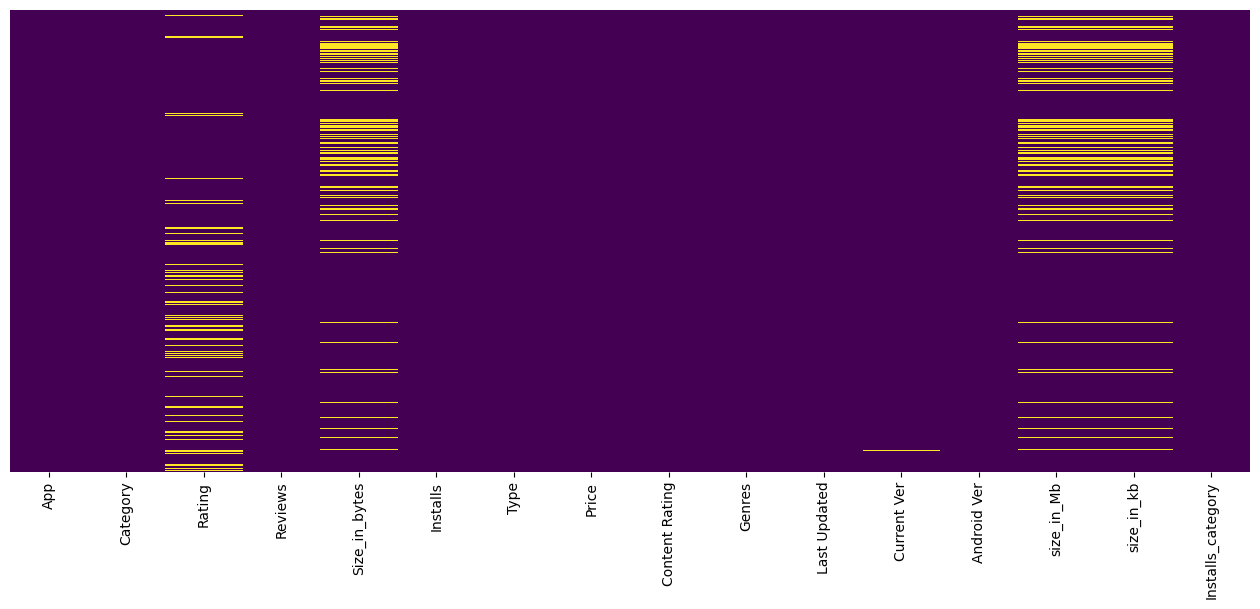

In [49]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

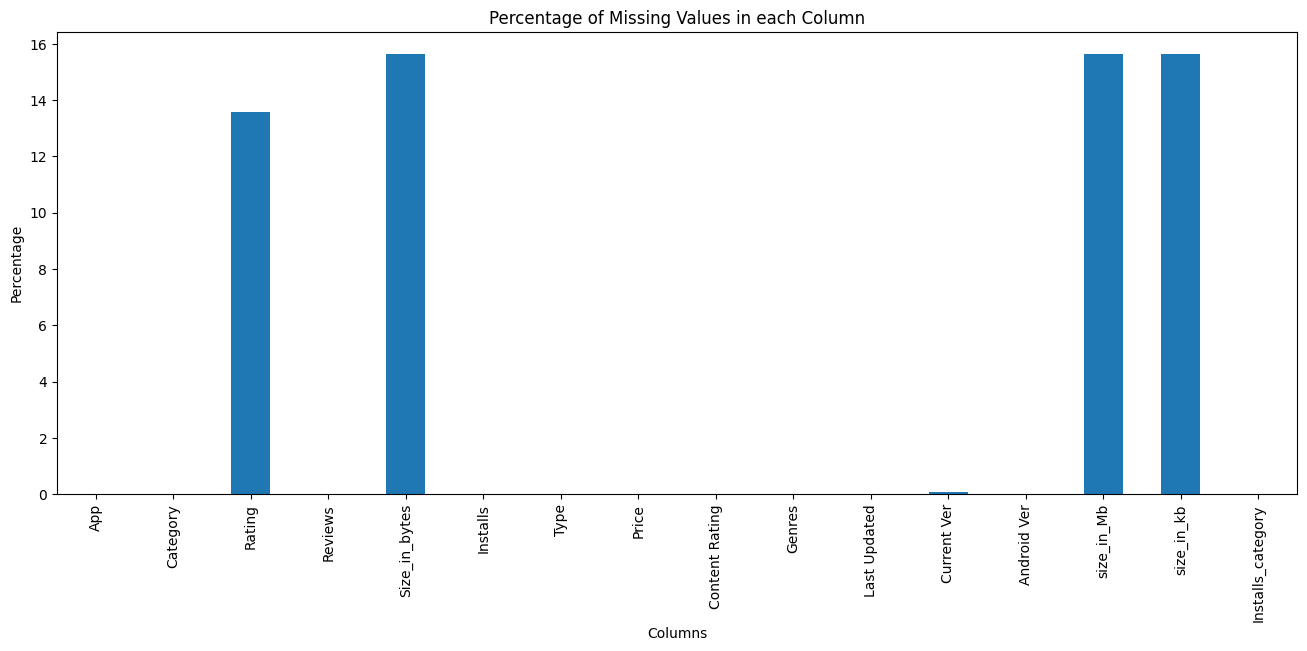

In [50]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

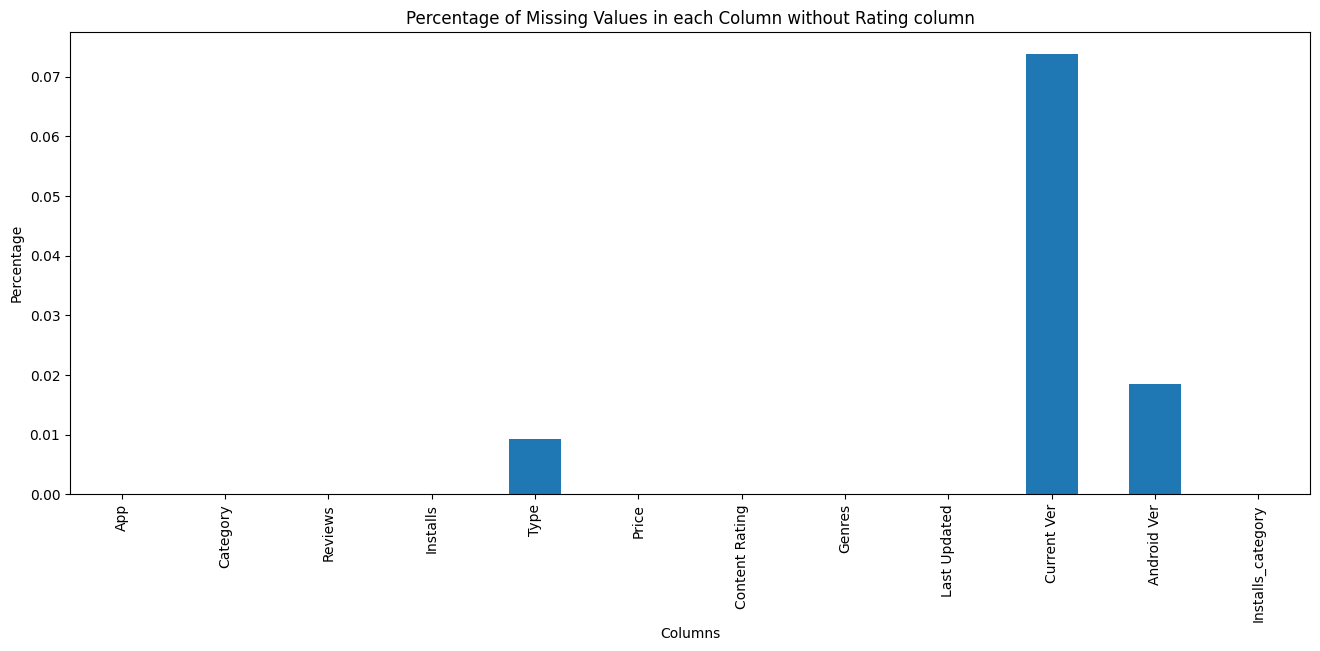

In [51]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [52]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1695
size_in_Mb           1695
size_in_kb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run correlation

In [53]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,size_in_Mb,size_in_kb
count,9368.000000,1.084200e+04,9.147000e+03,1.084200e+04,10842.000000,9147.000000,9147.000000
mean,4.191695,4.440714e+05,2.256970e+07,1.546158e+07,1.027179,21.524143,22040.722084
std,0.515181,2.927497e+06,2.369054e+07,8.502176e+07,15.948238,22.593055,23135.288830
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,2.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.470600e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


<Axes: >

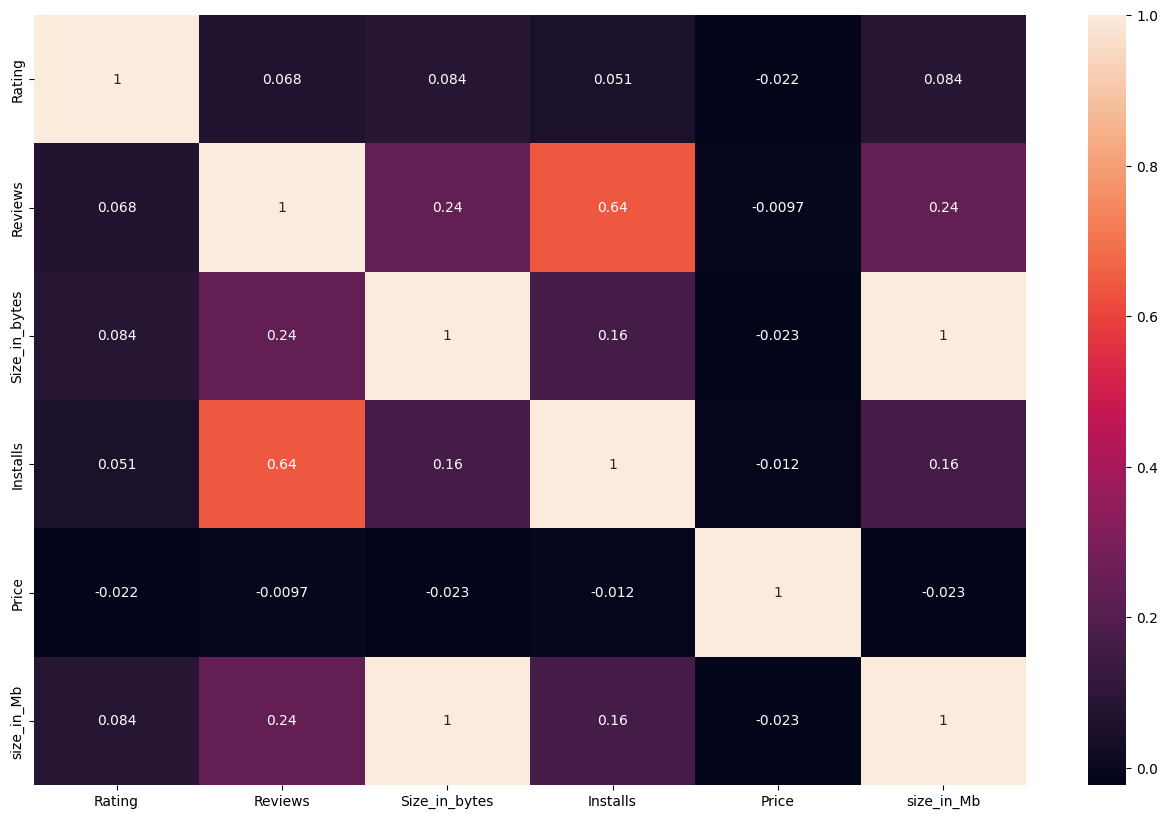

In [54]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [55]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,size_in_Mb
Rating,1.000000,0.068159,0.083516,0.051376,-0.021895,0.083516
Reviews,0.068159,1.000000,0.238094,0.643124,-0.009665,0.238094
Size_in_bytes,0.083516,0.238094,1.000000,0.164689,-0.023025,1.000000
Installs,0.051376,0.643124,0.164689,1.000000,-0.011687,0.164689
Price,-0.021895,-0.009665,-0.023025,-0.011687,1.000000,-0.023025
size_in_Mb,0.083516,0.238094,1.000000,0.164689,-0.023025,1.000000


In [56]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an app with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [57]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10842


In [58]:
# removing rows having missing values in the 'current ver','android ver',categpry,'type',and 'genres'

df.dropna(subset=["Current Ver","Android Ver","Category","Type","Genres"],inplace=True)

In [59]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10831


- we have reomved 11 rows having null values in 'Current  Ver',"Android Ver","Category","Type",genres columns

In [60]:
# Let' check null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
size_in_Mb           1694
size_in_kb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
  
---

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'size_in_Mb', 'size_in_kb',
       'Installs_category'],
      dtype='object')

In [62]:
# Use groupby function to find the trend of Rating in each install category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2115.0,4.207234,0.376535,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


- we can see in category `no` there is no values and in category `Very low` there are 81 values having mean 4.63 and std 0.84 ,min is 1.0,max is 5.0,25% values having 4.8 rating and  50 % & 75% values having rating 5.0
- simillarly in category `low` there are 1278 values having mean 4.17 and std 0.825 ,min is 1.0,max is 5.0 ,25% values having 3.8 rating and  50 % & 75% values having rating 5.0
- For category `moderate` there are 1440 values having mean 4.03 and std 0.604 ,min is 1.0,max is 5.0,25% values having 3.8 rating and  50 % & 75% values having rating 5.0.
- For category `more than moderate` there are 1616 values having mean 4.09 and std 0.505 ,min is 1.0,max is 5.0, 25% values having 3.9 rating and  50 % & 75% values having rating 5.0.
- For category `high` there are 2115 values having mean 4.20 and std 0.376 ,min is 1.8 ,max is 4.9, 25% values having 4.0 rating and  50 % & 75% values having rating 4.9
- For category `very high` there are 2004 values having mean 4.28 and std 0.294,min is 2.0,max is 4.9,25% values having 4.1 rating and  50 % & 75% values having rating 4.9.
- For category `Top notch` there are 828 values having mean 4.37 and std 0.19,min is 3.1,max is 4.8,25% values having 4.3 rating and  50 % & 75% values having rating 4.5

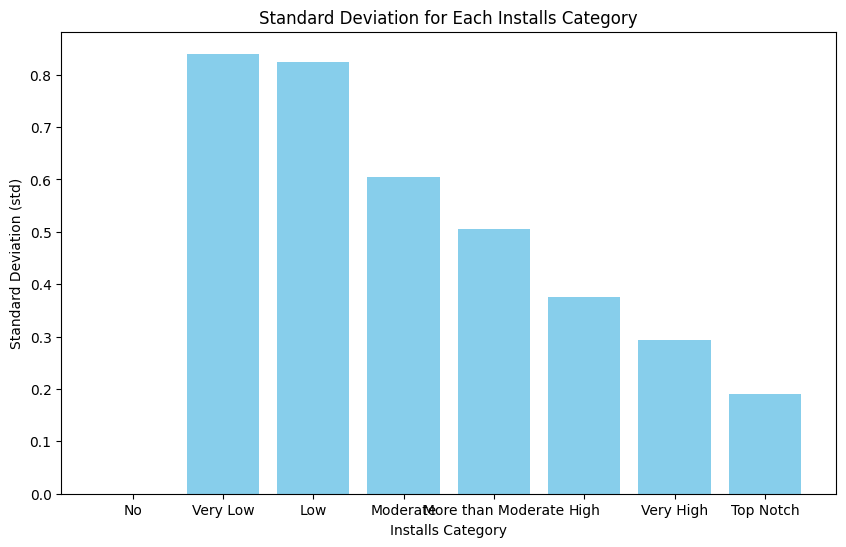

In [63]:
import matplotlib.pyplot as plt

# Data
categories = ["No", "Very Low", "Low", "Moderate", "More than Moderate", "High", "Very High", "Top Notch"]
std_values = [0, 0.84, 0.825, 0.604, 0.505, 0.376, 0.294, 0.19]  # Replace NaN with appropriate value

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, std_values, color='skyblue')
plt.xlabel('Installs Category')
plt.ylabel('Standard Deviation (std)')
plt.title('Standard Deviation for Each Installs Category')
plt.show()


In [64]:
df['Rating'].isnull().sum()

1469

In [65]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'NAN: 0')

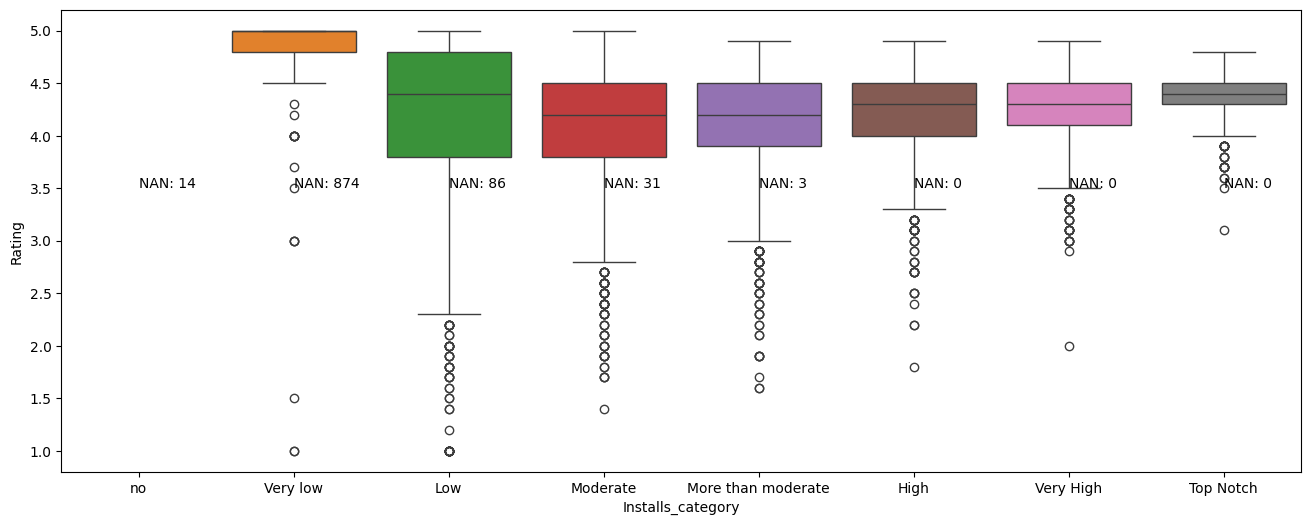

In [66]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'NAN: 14')
plt.text(1, 3.5, 'NAN: 874')
plt.text(2, 3.5, 'NAN: 86')
plt.text(3, 3.5, 'NAN: 31')
plt.text(4, 3.5, 'NAN: 3')
plt.text(5, 3.5, 'NAN: 0')
plt.text(6, 3.5, 'NAN: 0')
plt.text(7, 3.5, 'NAN: 0')

In [67]:
# in which Install_category the Reviews has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

<Axes: xlabel='Installs_category', ylabel='Reviews'>

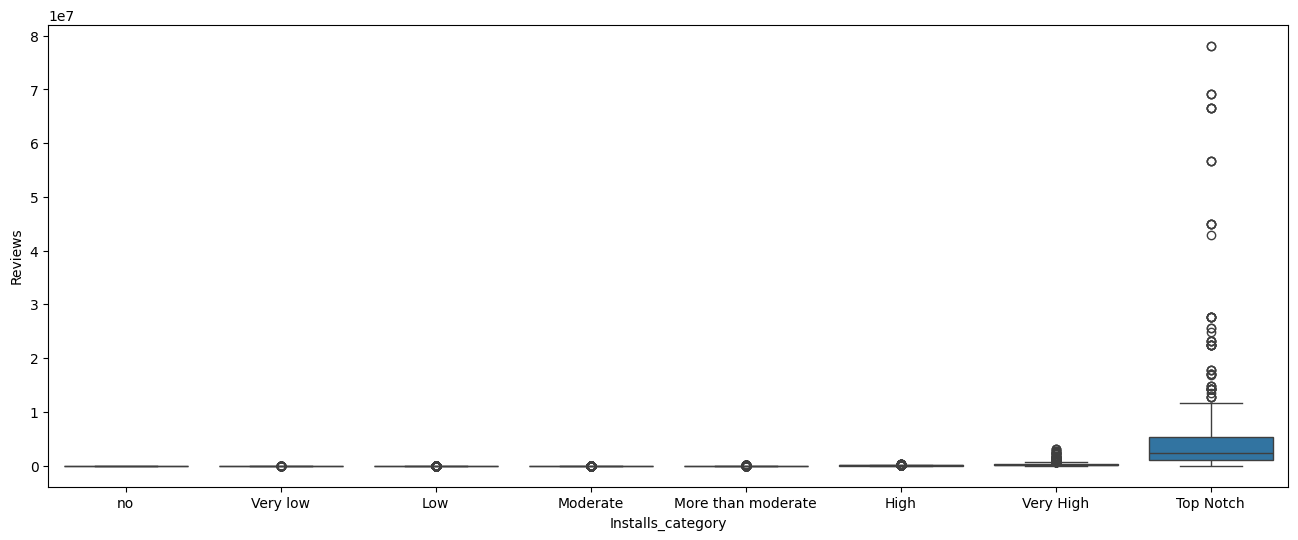

In [68]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

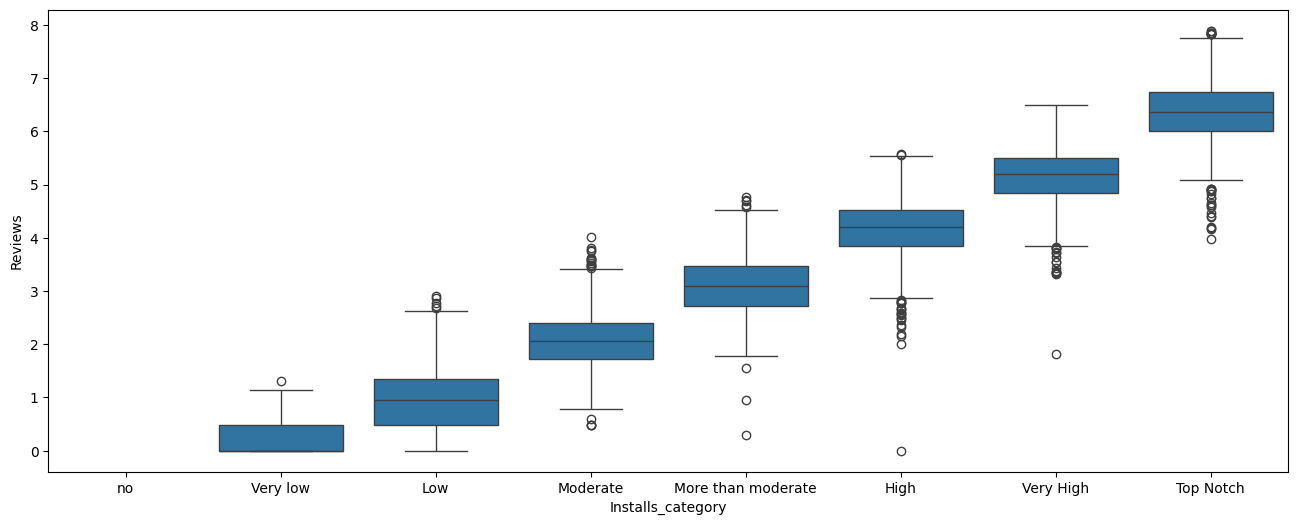

In [69]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

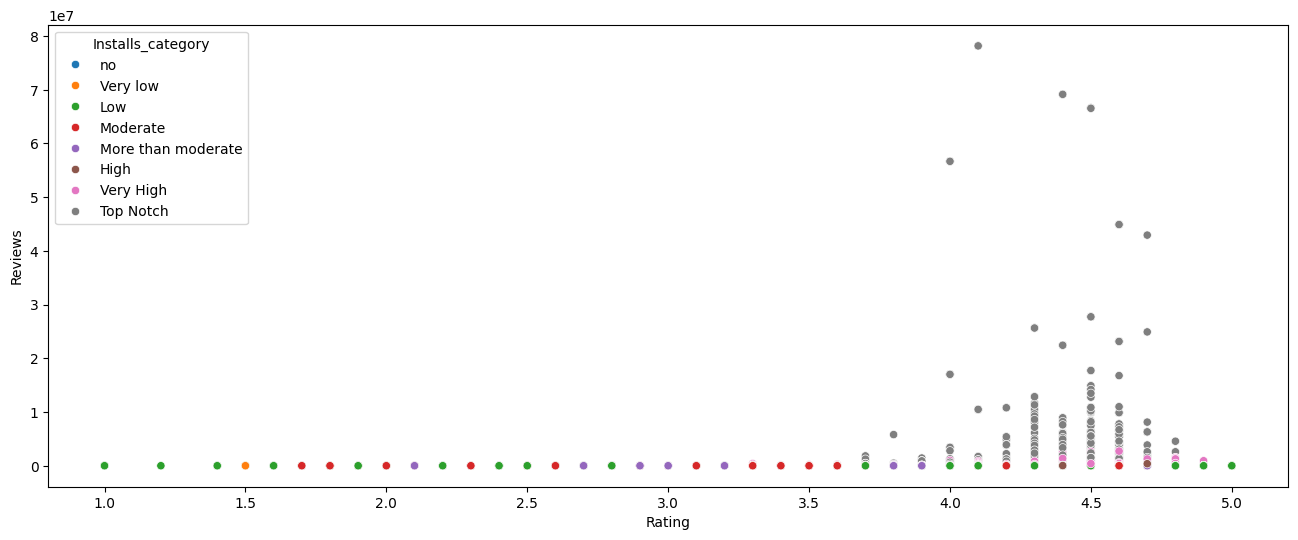

In [70]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

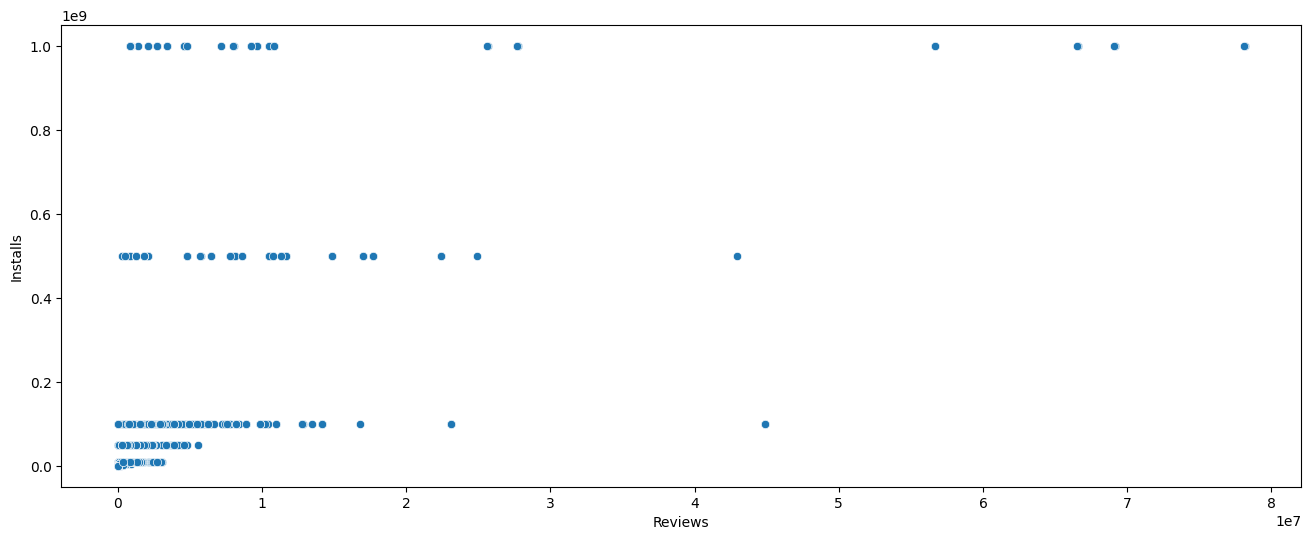

In [71]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

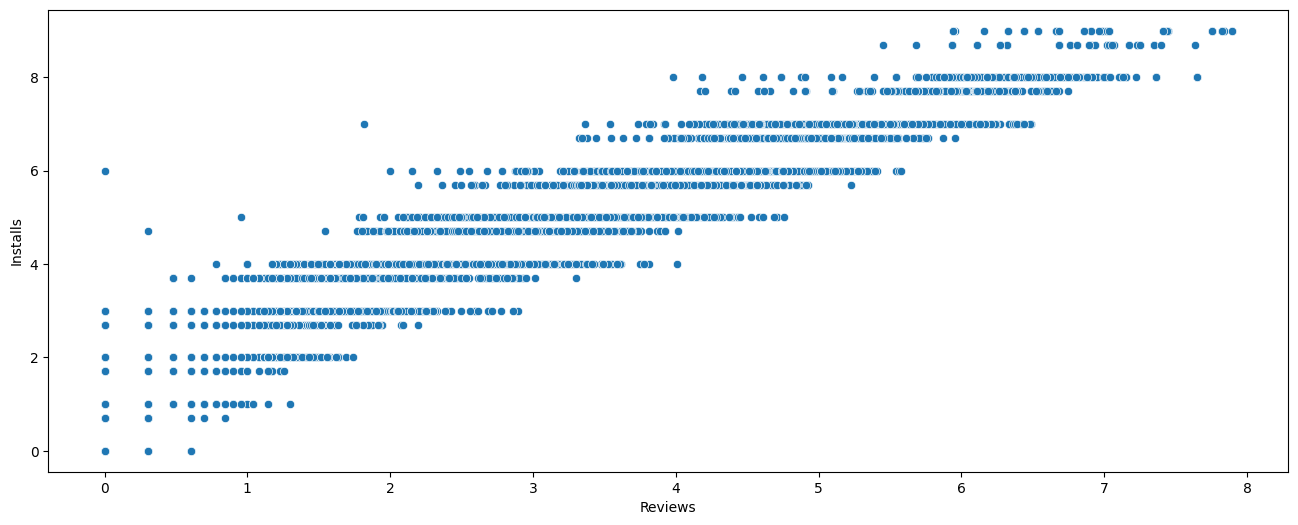

In [72]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

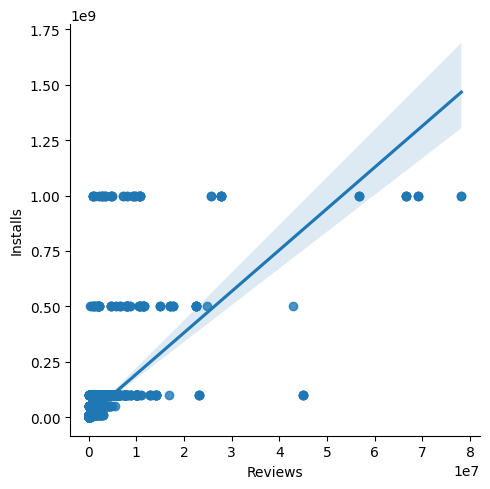

In [73]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [74]:
df.duplicated().sum()

483

In [75]:
# Find dupliactes based on 'App' column
df['App'].duplicated().sum()

1182

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [76]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1182
Number of duplicates in Category column are: 10798
Number of duplicates in Rating column are: 10791
Number of duplicates in Reviews column are: 4832
Number of duplicates in Size_in_bytes column are: 10375
Number of duplicates in Installs column are: 10811
Number of duplicates in Type column are: 10829
Number of duplicates in Price column are: 10739
Number of duplicates in Content Rating column are: 10825
Number of duplicates in Genres column are: 10712
Number of duplicates in Last Updated column are: 9454
Number of duplicates in Current Ver column are: 8000
Number of duplicates in Android Ver column are: 10797
Number of duplicates in size_in_Mb column are: 10375
Number of duplicates in size_in_kb column are: 10375
Number of duplicates in Installs_category column are: 10823


In [77]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [78]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,3891.2,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,3891.2,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,26624.0,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,26624.0,High
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,3891.2,Low


- Remove duplicates

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10348


----

# 3. Insight from data

# 3.1 WHich category  has the highest number of apps?

In [81]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       368
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**


In [82]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24153276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# 3.3 **Which category has the highest number of reviews?**

In [83]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601278296
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# 3.4 Which category has highest Rating?

In [85]:
# category with highest average rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

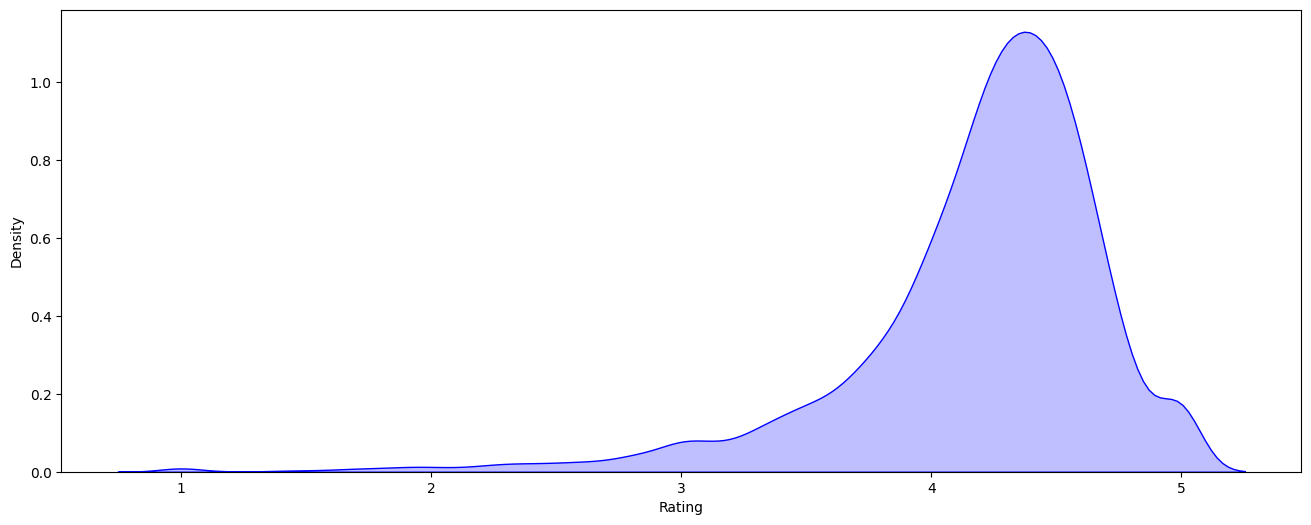

In [86]:
# plot the rating distribution
plt.figure(figsize=(16,6)) # make figure size

sns.kdeplot(df['Rating'],color="blue",shade=True) # plot the distribution plot


# Examples

## plot number of installs for free vs paid apps make a bar plot

<Axes: xlabel='Installs', ylabel='Price'>

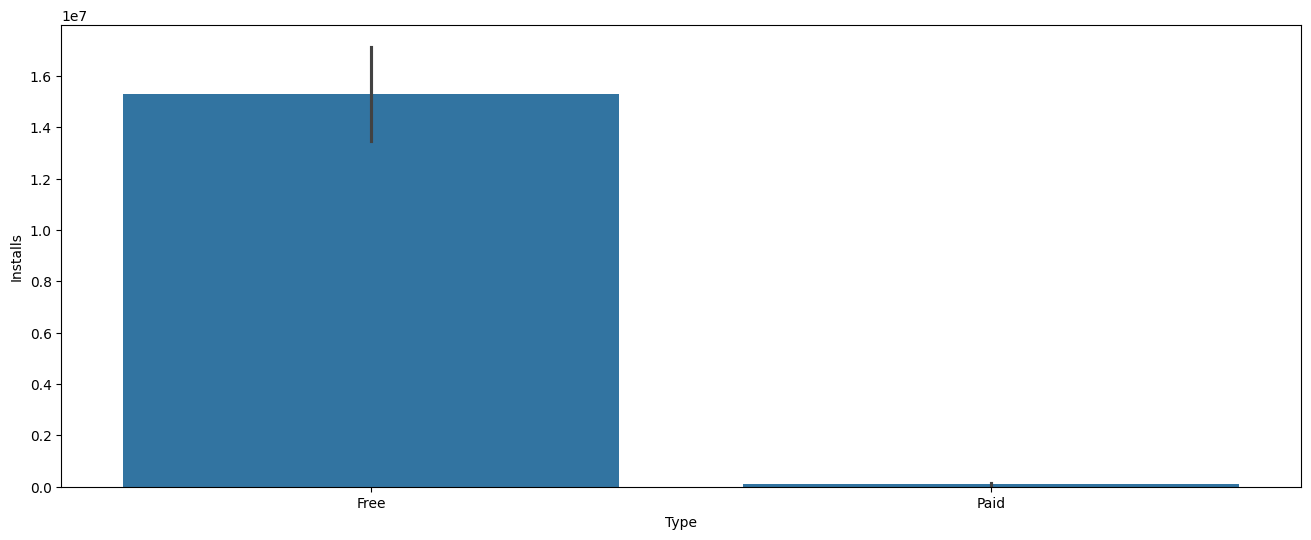

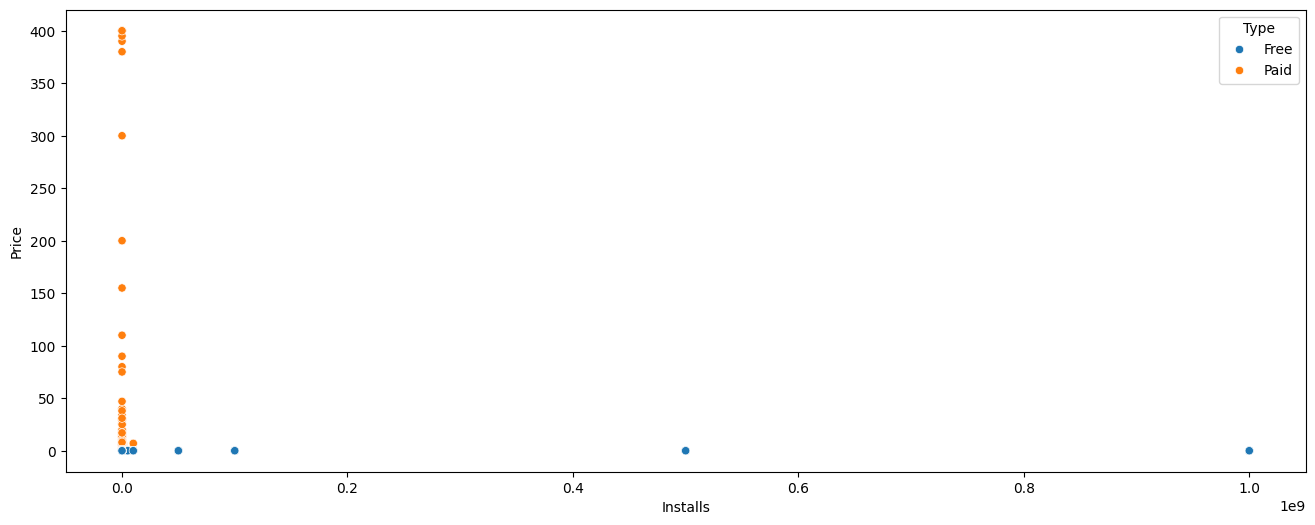

In [87]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

- we can see from above graphs that ,APPs with price FREE has more installs,but if we see at paid apps it has low installs

## Check if there is any impact of size on installs

<Axes: xlabel='Installs_category', ylabel='size_in_Mb'>

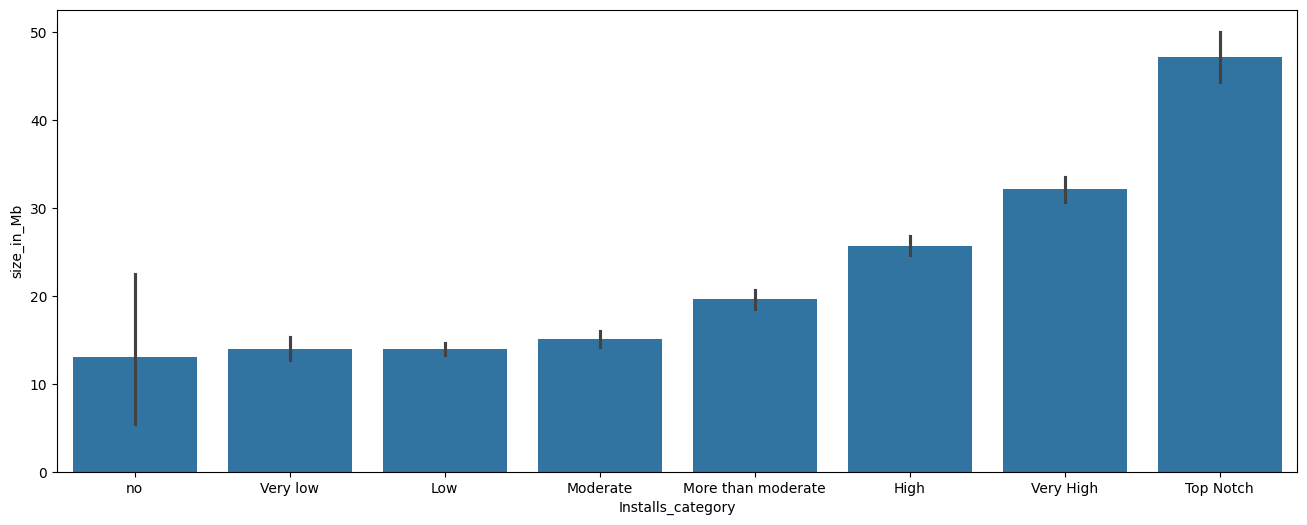

In [89]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='size_in_Mb', data=df) # plot the bar plot

- we can see from above bars that if we look at trend that as size increases the the number of installs increasing

# Which content rating is most popular in installs

In [90]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8374
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

- From Above data we can see that application which can be use by Every one has highest installs and App having age restriction have less installs

<Axes: xlabel='Content Rating', ylabel='Installs'>

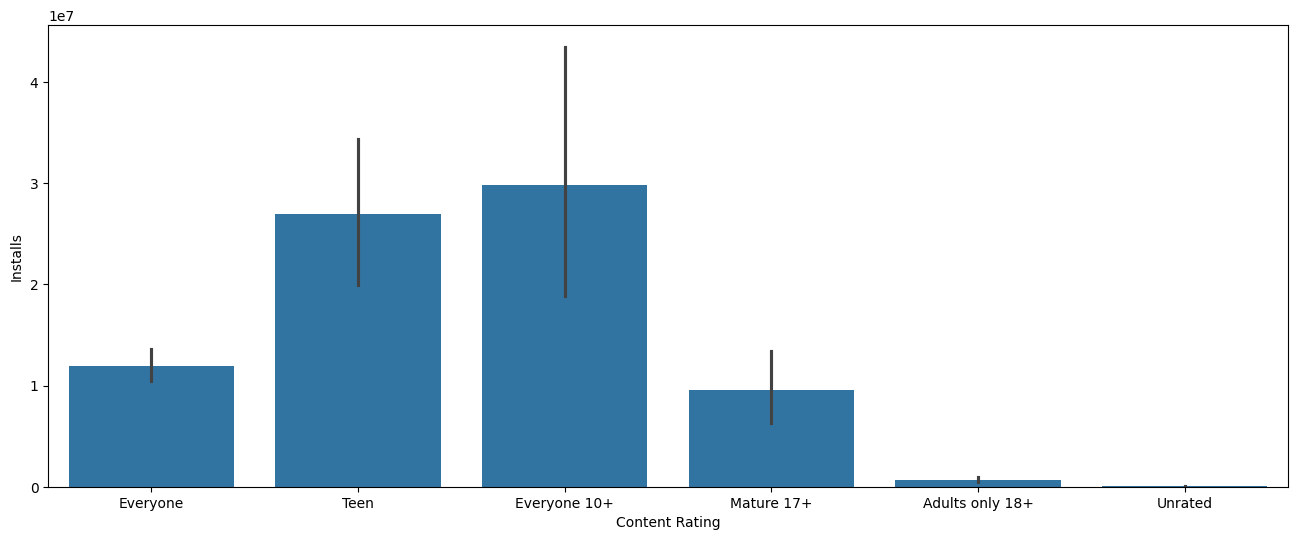

In [91]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [92]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           327
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

# Top 5 rated paid apps

<Axes: xlabel='App', ylabel='Rating'>

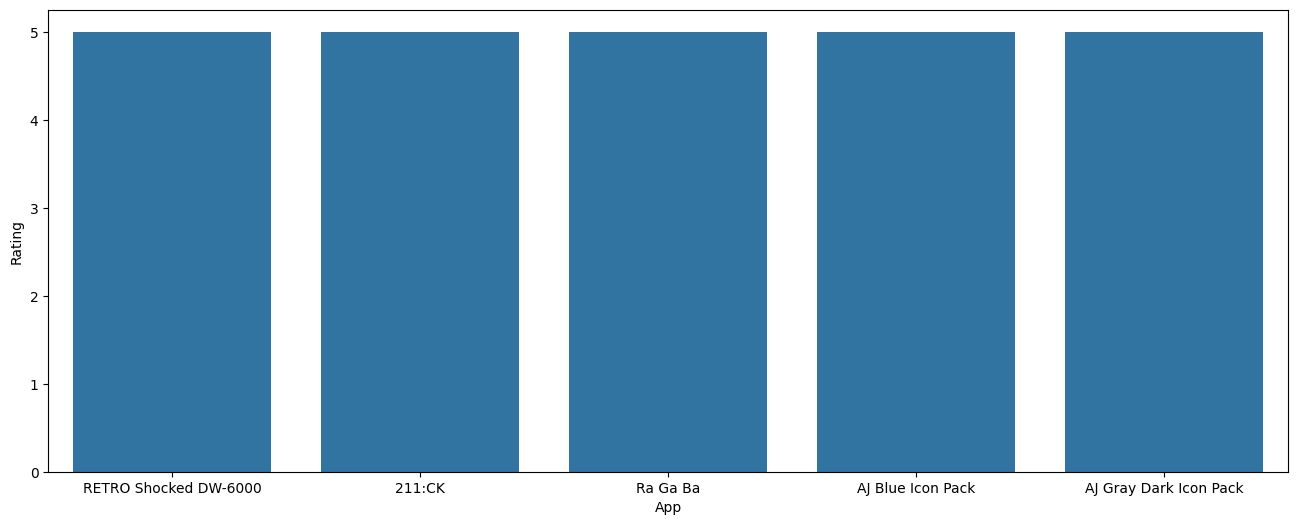

In [93]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [94]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,500.0,Low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,38912.0,Very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,20480.0,Very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,31744.0,Low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,35840.0,Very low


# Top 5 rated free apps

<Axes: xlabel='App', ylabel='Rating'>

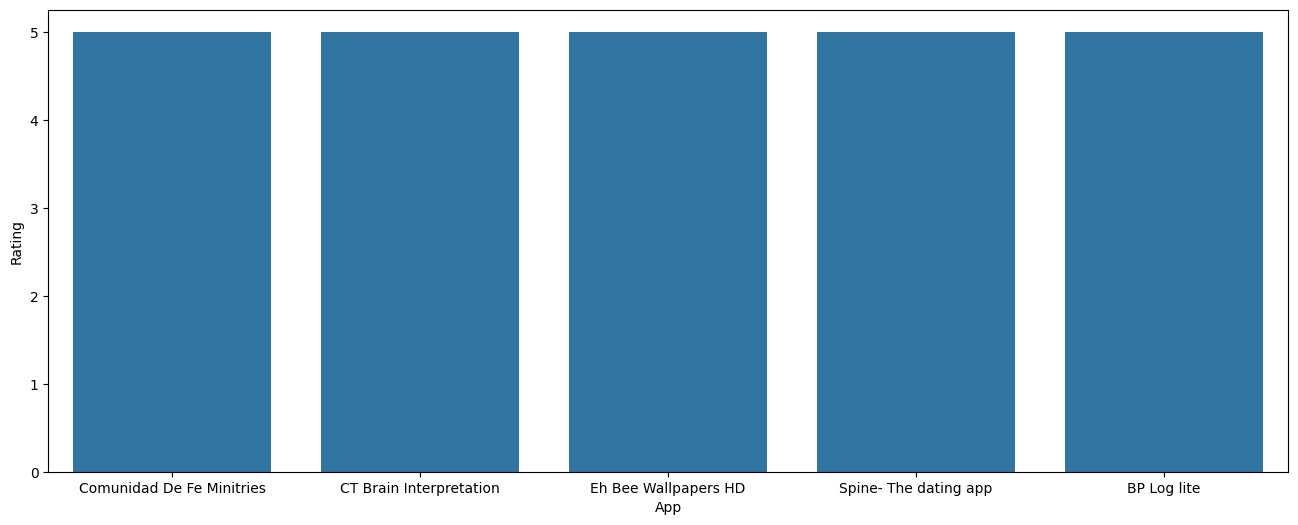

In [95]:
# plot top 5 rated Free apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [98]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb,Installs_category
10326,Comunidad De Fe Minitries,LIFESTYLE,5.0,19,11534336.0,500,Free,0.0,Everyone,Lifestyle,"March 1, 2018",1.1,4.1 and up,11.0,11264.0,Low
7865,CT Brain Interpretation,FAMILY,5.0,3,30408704.0,500,Free,0.0,Everyone,Education,"July 4, 2018",5.0.16,4.0 and up,29.0,29696.0,Low
9365,Eh Bee Wallpapers HD,PERSONALIZATION,5.0,4,4089446.4,100,Free,0.0,Everyone,Personalization,"April 24, 2018",1.0,4.1 and up,3.9,3993.6,Low
633,Spine- The dating app,DATING,5.0,5,9751756.8,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,9.3,9523.2,Low
6604,BP Log lite,LIFESTYLE,5.0,3,1572864.0,100,Free,0.0,Everyone,Lifestyle,"November 15, 2014",1.1,2.2 and up,1.5,1536.0,Low


# Top 5 Free apps based on Reviews

<Axes: xlabel='App', ylabel='Reviews'>

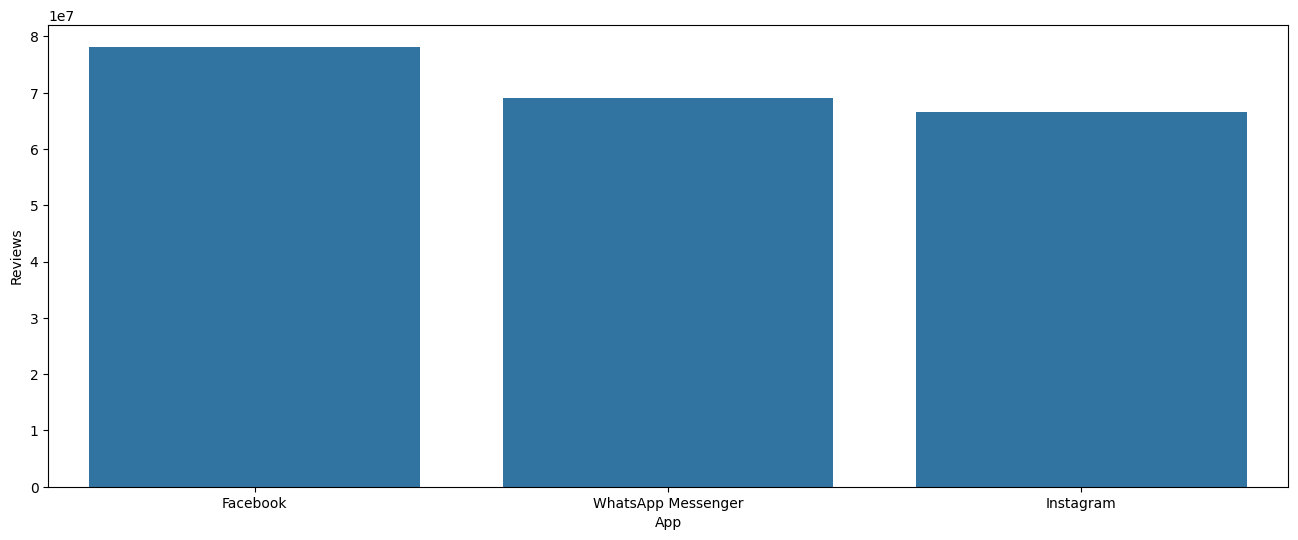

In [99]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [100]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch


# Plot top 5 Paid apps with highest number of reviews

<Axes: xlabel='App', ylabel='Reviews'>

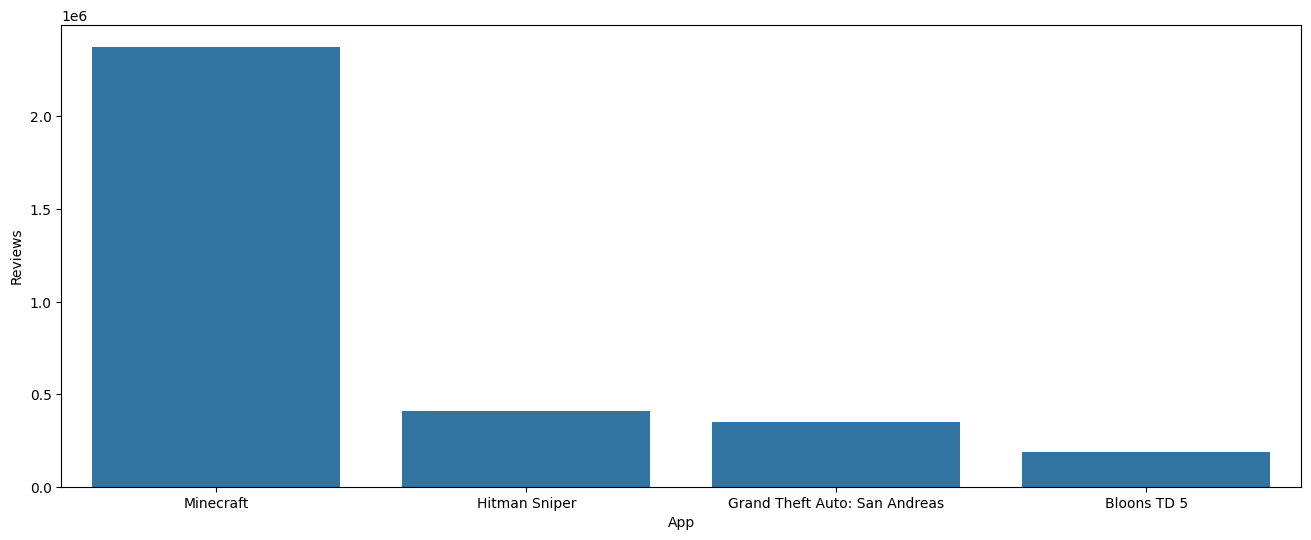

In [101]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [102]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_in_Mb,size_in_kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


In [103]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'size_in_Mb', 'size_in_kb',
       'Installs_category'],
      dtype='object')

---
# Assignment:
Make at least 15 Questions and Inspect the data find the answers and plot the graphs

----

---
- After Finishing this assignment, please make a complete project on one of the following Datasets:

# Google PlayStore Apps Big Data 
[Link to Download the data](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps/data)

### Google PlayStore Android App Data. (2.3 Million+ App Data)



Also checkout:

### * Apple AppStore Apps dataset: [Link](https://www.kaggle.com/gauthamp10/apple-appstore-apps)
### * Android App Permission dataset: [Link](https://www.kaggle.com/gauthamp10/app-permissions-android)